In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
cepheids_raw = pd.read_csv('ceph_data.csv')
cepheids_raw

,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification
0,0,0.007955,0.054861,14.653433,0.003739,16.111423,0.006698,16.698946,0.024877,15.325538,0.014622,-5.171356,DCEP
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP
4,4,0.219112,0.020837,NaN,NaN,13.930612,0.001861,14.570040,0.001326,13.142683,0.001473,-0.153982,DCEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,0.067521,0.036115,NaN,NaN,15.232883,0.003770,15.542849,0.007480,14.742361,0.003556,-1.110456,DCEP
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP
14998,14998,0.060838,0.033948,NaN,NaN,15.298103,0.000806,15.689356,0.011910,14.699787,0.008001,-1.379335,DCEP


In [24]:
# First I'll filter out any very dim or very distant stars.
# After looking it up, the general consensus is that stars with M ~8 or lower are reliable.
# Also, ~100 lightyears is the maximum distance for accurate usage of parallax. 
# So I'll go ahead and filter those out.

# Parallax equation is d = 1/p where d is in parsecs. 
# One parsec is 3.26 light years.
# So our equations to find the maximum become:

distance = 100 / 3.26
parallax_val = 1 / distance

# Now we filter them.

cepheids_filtered_mag = cepheids_raw[cepheids_raw['absMag'] <= 8] 
cepheids_final = cepheids_filtered_mag[cepheids_filtered_mag['parallax'] >= parallax_val]

cepheids_final

,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP
4,4,0.219112,0.020837,NaN,NaN,13.930612,0.001861,14.570040,0.001326,13.142683,0.001473,-0.153982,DCEP
5,5,0.085476,0.024270,1.668081,0.000060,14.593651,0.009135,15.271548,0.011074,13.772953,0.009983,-1.567836,DCEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,0.067521,0.036115,NaN,NaN,15.232883,0.003770,15.542849,0.007480,14.742361,0.003556,-1.110456,DCEP
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP
14998,14998,0.060838,0.033948,NaN,NaN,15.298103,0.000806,15.689356,0.011910,14.699787,0.008001,-1.379335,DCEP


In [44]:
# Now to add a luminosity column to use in graphing. 

sun_mag = 4.83
cepheids_final['lum'] = 10**((sun_mag - cepheids_final['absMag'])/2.5)
cepheids_final

/var/folders/l5/zs7f0lx525b0jl3ctgsmn9mc0000gn/T/ipykernel_24664/93703208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cepheids_final['lum'] = 10**((sun_mag - cepheids_final['absMag'])/2.5)


,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification,lum
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP,979.084247
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP,2363.854367
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP,452.744242
4,4,0.219112,0.020837,NaN,NaN,13.930612,0.001861,14.570040,0.001326,13.142683,0.001473,-0.153982,DCEP,98.535556
5,5,0.085476,0.024270,1.668081,0.000060,14.593651,0.009135,15.271548,0.011074,13.772953,0.009983,-1.567836,DCEP,362.354960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,0.067521,0.036115,NaN,NaN,15.232883,0.003770,15.542849,0.007480,14.742361,0.003556,-1.110456,DCEP,237.783923
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP,42.113089
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP,847.360579
14998,14998,0.060838,0.033948,NaN,NaN,15.298103,0.000806,15.689356,0.011910,14.699787,0.008001,-1.379335,DCEP,304.602926


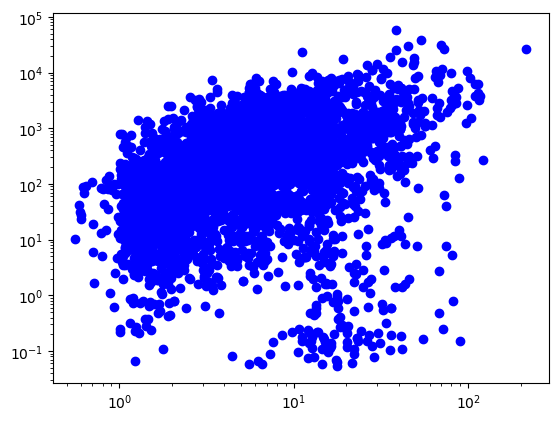

In [45]:
plt.scatter(cepheids_final['pf'], cepheids_final['lum'], marker ='o', color='b', label='Magnitude')
plt.xscale('log')
plt.yscale('log')

In [ ]:
# It's not a very clear example of where linear regression would show on the graph. Maybe include less values?